In [57]:
import torch
import os
import torchvision
from torch.utils.data import Dataset, Subset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
DATAPATH = '/mnt/coco/'


In [58]:
class cocoDataSet(Dataset):
    def __init__(self, data_dir, size=5000, transform=None):
        self.data_dir = data_dir
        self.size = size
        self.filenames = os.listdir(data_dir)
        self.transform = transform

    def __len__(self):
        return self.size

    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        # __getitem__ actually reads the img content
        image = torchvision.io.read_image(self.data_dir + self.filenames[index],
                                          mode=torchvision.io.ImageReadMode.GRAY)
        image = image.to(torch.float32)
        if self.transform:
            image = self.transform(image)
        return image


train_dataset.__len__() = 99957
valid_dataset.__len__() = 23446


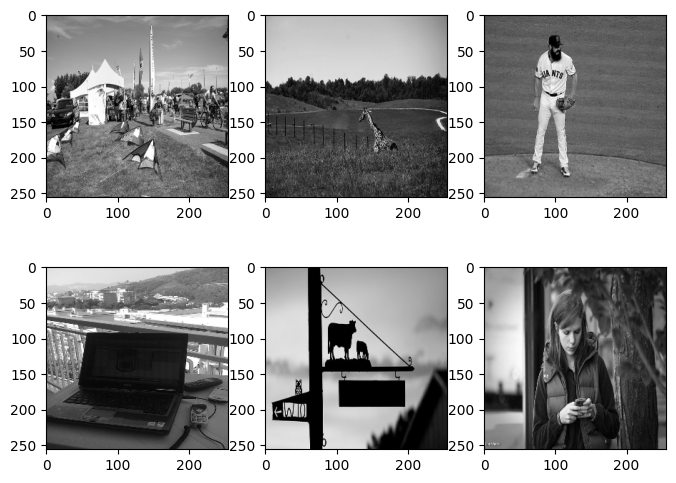

In [59]:
# Normalization parameters computed for different permutation of the training_dataset. Similar by 99.95%.
cocoData = cocoDataSet(DATAPATH,
                       size=123403,
                       transform=torchvision.transforms.Compose([
                           torchvision.transforms.Resize((256, 256)),
                           torchvision.transforms.Normalize(114.5939, 67.4973)]))
n_val = int(0.19 * len(cocoData))
idx = torch.randperm(len(cocoData))
# custom DataSet split: https://stackoverflow.com/a/61627600
train_dataset = Subset(cocoData, idx[:-n_val])
valid_dataset = Subset(cocoData, idx[-n_val:])
print(f'{train_dataset.__len__() = }\n{valid_dataset.__len__() = }')
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    idx = np.random.randint(0, len(train_dataset))
    img = train_dataset[idx]
    plt.imshow(img.cpu().permute(1, 2, 0), 'gray')
plt.show()

In [60]:
BATCH_SIZE = 53 # factorize 99958 = 2 x 23 x 41 x 53
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)